In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
credit  = pd.read_csv("../data/creditcard.csv")

In [ ]:
# This notebook explores the kaggle "Credit Card Fraud Detection" dataset
# https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
# This dataset includes "Time", "Amount", and 28 feature vectors that,
# to protect anonymity, have been effectively scrambled with PCA.
# Each transaction is labeled with "Class" as fraud or not;
# only 492 out of 284807 transactions were flagged as fraud.


In [2]:
credit


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


(array([254., 215., 219., 226., 200., 210., 216., 244., 231., 192., 149.,
        147., 203., 136., 192., 156., 253., 198., 143., 105.,  90., 518.,
        118.,  98., 118., 114., 104.,  92.,  79.,  84.,  98.,  88.,  81.,
         78.,  84.,  63.,  74.,  69.,  66.,  72.,  69.,  71.,  76., 122.,
         80.,  65.,  61.,  61.,  60.,  88.,  53.,  48.,  68., 121., 105.,
         47.,  62.,  84.,  66.,  66.,  70.,  86., 112., 420., 154., 108.,
         86.,  85.,  89.,  86.,  85.,  56.,  58.,  54.,  33.,  52.,  60.,
         60.,  57.,  52.,  47.,  53.,  51., 275.,  88.,  36.,  43.,  46.,
         58.,  43.,  37.,  26.,  43.,  38.,  32.,  32.,  39.,  40.,  26.,
         44.,  39.,  35.,  38.,  32.,  63.,  54.,  57.,  58.,  73.,  64.,
         77.,  72.,  76.,  70.,  71., 335.,  66.,  72.,  66.,  69.,  62.,
         64.,  59.,  84.,  74.,  83., 116.,  84.,  92.,  84.,  81., 104.,
        107.,  88.,  72.,  79.,  68.,  74.,  65., 109.,  93.,  98.,  94.,
         66.,  79., 117., 126., 111., 

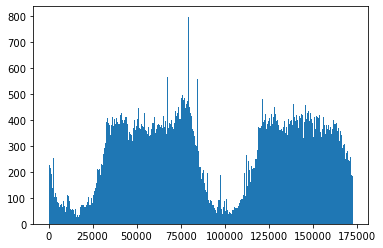

In [3]:
plt.hist(credit.Time, bins=1000)

(array([ 2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  4.,  3.,  1.,  1.,  2.,  0.,  4.,  1.,  4.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  1.,  0.,
         0.,  2.,  0.,  2.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,
         0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  0.,  1.,  0.,  1.,  0.,
         1.,  1.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,
         2.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  2.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  2.,  1.,  3.,
         2.,  4.,  0.,  0.,  0.,  1.,  0.,  2.,  0.,  0.,  5.,  0.,  0.,
         0.,  0.,  2.,  2.,  0.,  0.,  0.,  0.,  0.

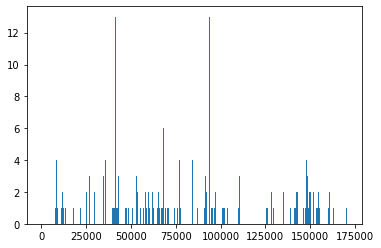

In [5]:
plt.hist(credit.query("Class==1").Time, bins=1000)

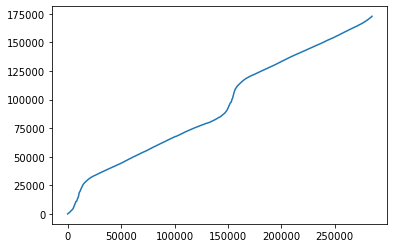

In [6]:
plt.plot(np.sort(credit.Time) )
fraud = credit.query("Class==1")

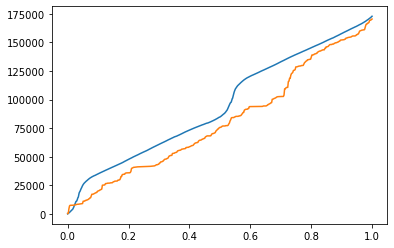

In [7]:
plt.plot(np.linspace(0,1,len(credit)), np.sort(credit.Time) )
plt.plot(np.linspace(0,1,len(fraud)), np.sort(fraud.Time) )

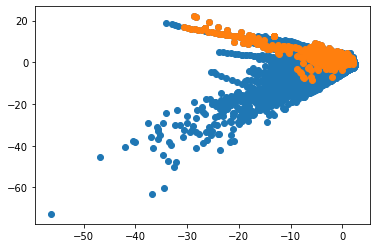

In [8]:
plt.plot(credit.V1, credit.V2, 'o')
plt.plot(fraud.V1, fraud.V2, 'o')

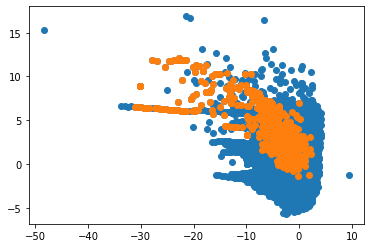

In [9]:
plt.plot(credit.V3, credit.V4, 'o')
plt.plot(fraud.V3, fraud.V4, 'o')

(0.0, 5000.0)

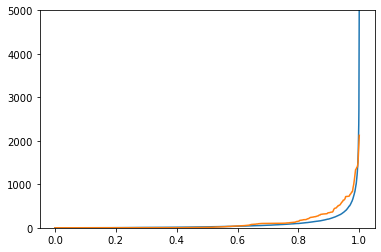

In [10]:
plt.plot(np.linspace(0,1,len(credit)), np.sort(credit.Amount) )
plt.plot(np.linspace(0,1,len(fraud)), np.sort(fraud.Amount) )
plt.ylim([0,5000])

(array([249.,  22.,   9.,  16.,  10.,   8.,   2.,   6.,   6.,  34.,  12.,
          8.,   7.,   1.,   3.,   2.,   1.,   5.,   5.,   1.,   3.,   1.,
          1.,   4.,   2.,   5.,   1.,   2.,   1.,   2.,   3.,   6.,   2.,
          1.,   3.,   4.,   1.,   0.,   1.,   0.,   0.,   0.,   1.,   1.,
          1.,   2.,   0.,   1.,   1.,   0.,   2.,   1.,   1.,   0.,   1.,
          0.,   1.,   0.,   1.,   1.,   0.,   0.,   2.,   0.,   1.,   0.,
          1.,   0.,   0.,   0.,   1.,   4.,   2.,   0.,   0.,   1.,   1.,
          0.,   0.,   1.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([   0.        ,   10.1010101 ,   20.2020202 ,   30.3030303 ,
          40.4040404 ,   50.50505051,   60.60606061,   70.70707071,
          80.80808081,   90.90909091,  101.01010101,  111.11111111,
         121.21212121,  131.31313131,  141.41414141,  151.51515152,
         161.61616162,  171.71717172,  181.81818182,  191.91

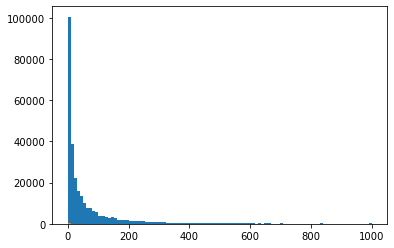

In [12]:
plt.hist( np.sort(credit.Amount), bins= np.linspace(0,1000, 100) )
plt.hist( np.sort(fraud.Amount),bins= np.linspace(0,1000, 100)  )


In [13]:
fraud.Amount.mean(), len(fraud), len(credit)

(122.21132113821133, 492, 284807)

In [14]:
randindex = np.random.permutation(len(fraud))
fraud1 = fraud.iloc[randindex[0:250],:]
fraud2 = fraud.iloc[randindex[250:],:]
scramblecredit = credit.iloc[np.random.permutation(len(credit)),:]
credit1 = scramblecredit.iloc[0:250,:]
credit2 = scramblecredit.iloc[250:500,:]

In [15]:
credit1.shape, credit2.shape, fraud1.shape, fraud2.shape

((250, 31), (250, 31), (250, 31), (242, 31))

In [16]:
X = np.vstack( [ credit1.iloc[:,1:-1], fraud1.iloc[:,1:-1]] ) 
Y = np.hstack( [ credit1["Class"],    fraud1["Class"]] ) 
X.shape, Y.shape

((500, 29), (500,))

In [17]:
Xtest = np.vstack( [ credit2.iloc[:,1:-1], fraud2.iloc[:,1:-1]] ) 
Ytest = np.hstack( [ credit2["Class"],    fraud2["Class"]] ) 
Xtest.shape, Ytest.shape

((492, 29), (492,))

In [18]:

credit2.iloc[:,1:-1]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
16346,-0.535443,0.980806,-0.699260,-0.235883,2.235770,3.498574,0.000504,1.244938,-0.975094,-0.414112,...,0.082393,0.166711,0.191830,-0.066597,1.002846,-0.060892,-0.318083,0.038781,0.097633,42.81
54183,-0.539221,0.815376,2.117610,0.810810,-0.410259,-0.795325,0.541512,0.062450,0.061587,-0.596553,...,-0.215482,-0.148986,-0.375671,-0.069019,0.847446,-0.122210,-0.596294,0.123176,0.125446,2.21
66160,-0.712262,-0.138930,1.121518,1.440779,-1.045596,2.101437,-0.131996,0.971555,1.030777,-0.972274,...,0.254717,0.011854,0.021294,0.378097,-1.341812,-0.107794,-0.208829,-0.025228,-0.006428,227.08
268117,-1.799591,1.960331,0.083595,-0.778418,-0.619734,-0.626201,-0.523349,1.207929,-0.197832,-1.986318,...,-0.372732,0.013536,-0.443679,0.136444,0.978956,-0.305815,-0.364874,-0.651811,-0.015485,1.46
212111,2.113298,0.141402,-1.931879,0.290046,0.677771,-0.570291,0.171692,-0.199783,0.536439,-0.376394,...,-0.140416,-0.400806,-1.047744,0.272857,-0.010974,-0.186572,0.205541,-0.063637,-0.036043,1.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206521,1.768253,-0.774983,-0.529064,1.626112,-0.518238,0.394008,-0.543246,0.097556,1.725025,-0.041120,...,-0.083814,0.253811,0.980563,-0.232216,-0.672204,0.338400,-0.254351,0.050451,-0.029860,113.40
172115,-2.004311,1.959506,-1.197268,-2.921854,0.464349,-0.352321,0.117544,1.298173,-0.400487,-1.144847,...,-0.032620,-0.226083,-0.878623,-0.068151,-0.325075,0.249399,0.396963,0.058808,0.085209,1.00
119841,-1.171518,0.333091,0.514236,-0.057486,1.126155,4.514310,-0.185707,1.529995,-0.446605,-0.864275,...,0.475815,0.148852,-0.058964,0.175202,0.980583,0.477209,-0.254667,-0.060257,0.037463,193.88
255099,-0.800695,0.559947,0.573908,-0.576410,0.475452,-1.021659,1.364686,-0.191811,0.126630,-1.254326,...,0.317200,-0.137112,-0.229311,0.032401,0.323779,0.007982,-0.147703,0.142166,0.001396,104.27


In [19]:
from sklearn.neighbors import KNeighborsClassifier

V= np.cov(X.T)
knn = KNeighborsClassifier(metric= 'mahalanobis', n_neighbors=5, 
            metric_params={'V': V} ).fit(X, Y)

In [20]:
%%time
Ypred = knn.predict(Xtest)

CPU times: user 306 ms, sys: 9.78 ms, total: 316 ms
Wall time: 453 ms


In [21]:
np.sum(np.equal(Ypred, Ytest))/ len(Ytest)

0.8495934959349594

In [22]:
indicate = pd.DataFrame( {"i": 10*Ytest + Ypred}).i.value_counts()
indicate

0     238
11    180
10     62
1      12
Name: i, dtype: int64

In [23]:
TN = 234; TP = 189; FP = 16; FN = 53

In [24]:
# Sensitivity and Specificity, true positive rate and true negative rate:
SENS = TP / (TP + FN)
SPEC = TN / (TN + FP)

In [25]:
# PPV and NPV, the error rates conditional on the test result
PPV = TP / (TP + FP)
NPV = TN / (TN + FN)
print("Sensitivity", SENS, "Specificity", SPEC)
print("PPV", PPV, "NPV", NPV)

Sensitivity 0.78099173553719 Specificity 0.936
PPV 0.9219512195121952 NPV 0.8153310104529616


In [ ]:
# This is not very.. satisfying?  It seems like it's working, but knn gives us no insight into what is happening.

In [26]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X,Y)

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Here I get a warning ConvergenceWarning: lbfgs failed to converge (status=1): STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.
# With a pointer to the skikitlearn-documentation hinting that this is sometimes caused by
# numerically poorly-distributed data, and that I should consider scaling or normalizing.

In [28]:
# This is easily accomplished with off-the-shelf scaling functions:
from sklearn.preprocessing import StandardScaler
Xsc = StandardScaler().fit_transform(X)
lr = LogisticRegression().fit(Xsc,Y)

In [29]:
dir(lr)

['C',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_predict_proba_lr',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'class_weight',
 'classes_',
 'coef_',
 'decision_function',
 'densify',
 'dual',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'intercept_scaling',
 'l1_ratio',
 'max_iter',
 'multi_class',
 'n_features_in_',
 'n_iter_',
 'n_jobs',
 'penalty',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'random_state',
 'score',
 'set_params',
 'solver',
 'sparsify',
 'tol',
 'verbose',
 'w

In [30]:
lr.coef_

array([[ 0.16451675,  0.20771019, -1.1461558 ,  2.28937528,  0.40493469,
        -0.44166729, -0.28296602, -1.69669636, -0.47562027, -1.06905119,
         0.48351112, -1.28872585, -0.15865538, -3.05450063,  0.18975049,
        -0.35327218,  0.50218101, -0.12676744,  0.18476878, -1.14890747,
        -0.24461674,  0.4403318 ,  0.18428411, -0.05846579,  0.16565968,
        -0.36796149,  0.39864274,  0.45824242,  0.806339  ]])

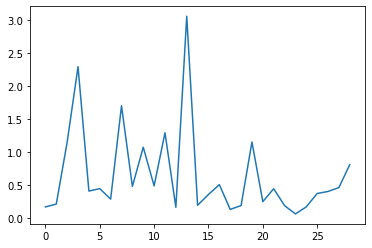

In [31]:
plt.plot(np.abs(lr.coef_)[0])

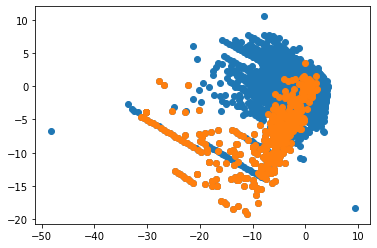

In [32]:
# Looks like V3 and V14??
plt.plot(credit.V3, credit.V14, 'o')
plt.plot(fraud.V3, fraud.V14, 'o')

(array([ 3.,  5.,  1., 10., 22., 22., 19., 26., 38., 45., 54., 49., 64.,
        43., 19., 22., 28., 17.,  4.,  1.]),
 array([-19.21432549, -18.08148812, -16.94865074, -15.81581337,
        -14.68297599, -13.55013862, -12.41730124, -11.28446387,
        -10.1516265 ,  -9.01878912,  -7.88595175,  -6.75311437,
         -5.620277  ,  -4.48743962,  -3.35460225,  -2.22176488,
         -1.0889275 ,   0.04390987,   1.17674725,   2.30958462,
          3.442422  ]),
 <BarContainer object of 20 artists>)

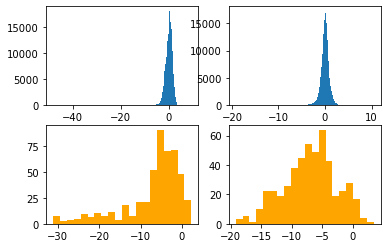

In [33]:
plt.subplot(221)
plt.hist(credit.V3, bins=300)
plt.subplot(222)
plt.hist(credit.V14, bins=300)
plt.subplot(223)
plt.hist(fraud.V3,  bins=20, color="orange")
plt.subplot(224)
plt.hist(fraud.V14,  bins=20, color="orange")

In [ ]:
# I can conclude that fraud has much larger variance than the non-fraud cases on
# these two dimensions. 